In [1]:
import os
import random
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

import warnings
warnings.filterwarnings('ignore')

In [2]:
light_df = pd.read_csv('open/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])

light_df = light_df.groupby(['도시', '구', '동']).sum().reset_index()
light_df.reset_index(inplace=True, drop=True)

In [3]:
child_area_df = pd.read_csv('open/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949').drop_duplicates()[['소재지지번주소']]
child_area_df['cnt'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])

child_area_df = child_area_df.groupby(['도시', '구', '동']).sum().reset_index()
child_area_df.reset_index(inplace=True, drop=True)

In [4]:
parking_df = pd.read_csv('open/external_open/대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)

In [5]:
train_org = pd.read_csv('open/train.csv') 
test_org = pd.read_csv('open/test.csv')

display(train_org.head())
display(test_org.head())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [6]:
train_df = train_org.copy()
test_df = test_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다 
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다 

# 해당 과정을 test_x에 대해서도 반복해줍니다 
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

In [7]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

In [8]:
# road_pattern = r'(.+) - (.+)'

# train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
# train_df = train_df.drop(columns=['도로형태'])

# test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
# test_df = test_df.drop(columns=['도로형태'])

In [9]:
# train_df와 test_df에, light_df와 child_area_df, parking_df를 merge하세요.
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])

In [10]:
train_df

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,설치개수,cnt,급지구분
0,ACCIDENT_00000,화요일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,391.0,2.0,11.0
1,ACCIDENT_00001,화요일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,932.0,NaN,11.0
2,ACCIDENT_00002,화요일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동,473.0,5.0,NaN
3,ACCIDENT_00003,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동,534.0,11.0,33.0
4,ACCIDENT_00004,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동,2057.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,수성구,수성동3가,NaN,1.0,NaN
39605,ACCIDENT_39605,금요일,맑음,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,달서구,상인동,843.0,NaN,15.0
39606,ACCIDENT_39606,금요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상,0,2,0,0,10,2021,12,31,21,대구광역시,달서구,월성동,164.0,NaN,2.0
39607,ACCIDENT_39607,금요일,맑음,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상,0,0,1,0,3,2021,12,31,22,대구광역시,달서구,장동,210.0,NaN,3.0


In [11]:
test_df

,ID,요일,기상상태,도로형태,노면상태,사고유형,연,월,일,시간,도시,구,동,설치개수,cnt,급지구분
0,ACCIDENT_39609,토요일,맑음,교차로 - 교차로안,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,700.0,5.0,NaN
1,ACCIDENT_39610,토요일,맑음,단일로 - 기타,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,NaN,10.0,6.0
2,ACCIDENT_39611,토요일,맑음,교차로 - 교차로안,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,NaN,1.0,NaN
3,ACCIDENT_39612,토요일,맑음,단일로 - 기타,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,NaN,7.0,7.0
4,ACCIDENT_39613,토요일,맑음,교차로 - 교차로안,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,932.0,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,토요일,맑음,단일로 - 터널,건조,차대차,2022,12,31,18,대구광역시,남구,대명동,5377.0,26.0,22.0
10959,ACCIDENT_50568,토요일,맑음,단일로 - 기타,건조,차대차,2022,12,31,18,대구광역시,수성구,시지동,NaN,5.0,NaN
10960,ACCIDENT_50569,토요일,맑음,단일로 - 기타,건조,차대차,2022,12,31,20,대구광역시,수성구,연호동,NaN,NaN,NaN
10961,ACCIDENT_50570,토요일,맑음,교차로 - 교차로부근,건조,차대차,2022,12,31,20,대구광역시,수성구,범물동,NaN,7.0,NaN


In [12]:
import plotly.express as px
import pandas as pd

# 'ECLO' 컬럼의 값 분포를 histogram으로 시각화
fig = px.histogram(train_df, x='ECLO', nbins=100, labels={'ECLO': 'ECLO 값', 'count': '빈도'})
fig.update_layout(title='ECLO 값 분포 Histogram')

# 하위 99%와 상위 1% 기준선 추가
eclo_99th_percentile = train_df['ECLO'].quantile(0.99) # 이상치 제거를 위한 기준점 도출
fig.add_shape(
    dict(
        type='line',
        x0=eclo_99th_percentile,
        x1=eclo_99th_percentile,
        y0=0,
        y1=15000, #max(fig.data[0].y),
        line=dict(color='red', width=2, dash='dash')
    )
)

# 기준선 어노테이션 추가
fig.add_annotation(
    x=eclo_99th_percentile,
    y=15000,
    text=f'99th Percentile - {eclo_99th_percentile}',
    showarrow=True,
    arrowhead=4,
    ax=0,
    ay=-40
)

fig.show()

In [13]:
eclo_99th_percentile

16.0

In [14]:
train_df = train_df[train_df['ECLO'] < eclo_99th_percentile]

In [15]:
test_x = test_df.drop(columns=['ID']).copy()
train_x = train_df[test_x.columns].copy()
train_y = train_df['ECLO'].copy()

#### 기상상태별 교통사고 위험도

In [16]:
weather = pd.read_csv('open/external_open/도로교통공단_도로종류별 기상상태별 교통사고 통계_20221231.csv', encoding='cp949')
weather_ag = weather.drop(['도로종류'], axis=1).groupby('기상상태').sum()
weather_ag.index = ['기타', '눈', '맑음', '비', '안개', '흐림']

# 사고건수 대비 ECLO(인명피해 심각도) 계산 후 위험도 정규화(Min-Max) 진행
weather_ag['weather_danger'] = ((10 * weather_ag['사망자수']) + (5 * weather_ag['중상자수']) + (3 * weather_ag['경상자수']) + (1 * weather_ag['부상신고자수'])) / weather_ag['사고건수'] 
weather_ag['weather_danger'] = (weather_ag['weather_danger'] - weather_ag['weather_danger'].min())/ (weather_ag['weather_danger'].max() - weather_ag['weather_danger'].min())

# 날씨별 위험도 딕셔너리 생성
weather_danger_dic = dict(zip(weather_ag.index, weather_ag['weather_danger']))
weather_danger_dic

{'기타': 0.0,
 '눈': 0.630249016035219,
 '맑음': 0.14492007954600153,
 '비': 0.3198248805428553,
 '안개': 1.0,
 '흐림': 0.21384592769016494}

#### 도로형태별 교통사고 위험도

In [17]:
# 데이터로드, 마지막 두 행 선택 및 통일 후 재결합
roadshape2020_df = pd.read_csv('open/external_open/도로교통공단_도로형태별 교통사고(2020).csv', encoding='cp949')
roadshape2020_df.drop(8, inplace=True)
last_two_rows = roadshape2020_df.iloc[8:,:]
last_two_rows.loc[:, '도로형태_대분류'] = last_two_rows.iloc[0]['도로형태_대분류']
last_two_rows.loc[:, '도로형태'] = last_two_rows.iloc[0]['도로형태']
summed_rows = last_two_rows.groupby(['도로형태_대분류', '도로형태']).sum().reset_index()

roadshape2020_df = pd.concat([roadshape2020_df.iloc[:8,:], summed_rows])

# 데이터로드, 마지막 두 행 선택 및 통일 후 재결합
roadshape2021_df = pd.read_csv('open/external_open/도로교통공단_도로형태별 교통사고(2021).csv', encoding='cp949')
roadshape2021_df.drop(8, inplace=True)
last_two_rows = roadshape2021_df.iloc[8:,:]
last_two_rows.loc[:, '도로형태_대분류'] = last_two_rows.iloc[0]['도로형태_대분류']
last_two_rows.loc[:, '도로형태'] = last_two_rows.iloc[0]['도로형태']
summed_rows = last_two_rows.groupby(['도로형태_대분류', '도로형태']).sum().reset_index()

roadshape2021_df = pd.concat([roadshape2020_df.iloc[:8,:], summed_rows])

# 데이터로드, 마지막 행 편집
roadshape2022_df = pd.read_csv('open/external_open/도로교통공단_도로형태별 교통사고(2022).csv', encoding='cp949')
roadshape2022_df.drop(8, inplace=True)
roadshape2022_df.iloc[8:,:2] = ['기타', '기타']

roadshape_df = pd.concat([roadshape2020_df, roadshape2021_df, roadshape2022_df]).groupby(['도로형태_대분류', '도로형태']).sum().reset_index()
roadshape_df['도로형태'] = ['교차로안', '교차로부근', '교차로횡단보도내', '기타', '고가도로위', '교량', '기타', '지하차도(도로)내', '터널']
roadshape_df['roadshape_danger'] = ((10 * roadshape_df['사망자수']) + (5 * roadshape_df['중상자수']) + (3 * roadshape_df['경상자수']) + (1 * roadshape_df['부상신고자수'])) / roadshape_df['사고건수'] 
roadshape_df['roadshape_danger'] = (roadshape_df['roadshape_danger'] - roadshape_df['roadshape_danger'].min())/ (roadshape_df['roadshape_danger'].max() - roadshape_df['roadshape_danger'].min())
roadshape_df['도로형태'] = roadshape_df['도로형태_대분류'] + " - " + roadshape_df['도로형태']
roadshape_df = roadshape_df.iloc[:,1:]

# 날씨별 위험도 딕셔너리 생성
roadshape_danger_dic = dict(zip(roadshape_df['도로형태'], roadshape_df['roadshape_danger']))
roadshape_danger_dic['주차장 - 주차장'] = 0.5 # 없는 데이터 위험도 0.5로 통일
roadshape_danger_dic['미분류 - 미분류'] = 0.5 # 없는 데이터 위험도 0.5로 통일
roadshape_danger_dic

{'교차로 - 교차로안': 0.28371010316150946,
 '교차로 - 교차로부근': 0.21443340820597145,
 '교차로 - 교차로횡단보도내': 0.0,
 '기타 - 기타': 0.07573804112828718,
 '단일로 - 고가도로위': 0.4774196135018285,
 '단일로 - 교량': 0.48446609165016485,
 '단일로 - 기타': 0.2067045082897451,
 '단일로 - 지하차도(도로)내': 0.3439542378490483,
 '단일로 - 터널': 1.0,
 '주차장 - 주차장': 0.5,
 '미분류 - 미분류': 0.5}

#### 시간대별 교통사고 위험도

In [18]:
time2018_df = pd.read_csv('open/external_open/도로교통공단_도로형태별 시간대별 교통사고(2018).csv', encoding='cp949')
time2018_df = time2018_df.iloc[:,2:]
time2018_df = time2018_df.groupby(['발생시간_분류']).sum().reset_index()
time2018_df.rename(columns={'발생시간_분류':'시간대'}, inplace=True)

time2019_df = pd.read_csv('open/external_open/도로교통공단_도로형태별 시간대별 교통사고(2019).csv', encoding='cp949')
time2019_df = time2019_df.iloc[:,2:]
time2019_df = time2019_df.groupby(['발생시간_분류']).sum().reset_index()
time2019_df.rename(columns={'발생시간_분류':'시간대'}, inplace=True)

time2021_df = pd.read_csv('open/external_open/도로교통공단_도로형태별 시간대별 교통사고(2021).csv', encoding='cp949')
time2021_df = time2021_df.iloc[:,2:]
time2021_df = time2021_df.groupby(['시간대']).sum().reset_index()

time2022_df = pd.read_csv('open/external_open/도로교통공단_도로형태별 시간대별 교통사고(2022).csv', encoding='cp949')
time2022_df = time2022_df.iloc[:,2:]
time2022_df = time2022_df.groupby(['시간대']).sum().reset_index()

time_df = pd.concat([time2018_df, time2019_df, time2021_df, time2022_df]).groupby(['시간대']).sum().reset_index()
time_df['time_danger'] = ((10 * time_df['사망자수']) + (5 * time_df['중상자수']) + (3 * time_df['경상자수']) + (1 * time_df['부상신고자수'])) / time_df['사고건수'] 
time_df['time_danger'] = (time_df['time_danger'] - time_df['time_danger'].min())/ (time_df['time_danger'].max() - time_df['time_danger'].min())

time_df_danger_dic = {}
count = 0
for f in range(3):
    for b in range(10):
        if f"{f}{b}" == "24":
            break
        time_df_danger_dic[int(f"{f}{b}")] = time_df['time_danger'][count//2]
        count += 1

time_df_danger_dic

{0: 0.9155015885837771,
 1: 0.9155015885837771,
 2: 0.9576499818930245,
 3: 0.9576499818930245,
 4: 1.0,
 5: 1.0,
 6: 0.3539509636954647,
 7: 0.3539509636954647,
 8: 0.08551203039087009,
 9: 0.08551203039087009,
 10: 0.4064413368531681,
 11: 0.4064413368531681,
 12: 0.46508264354822065,
 13: 0.46508264354822065,
 14: 0.4517063261223543,
 15: 0.4517063261223543,
 16: 0.20146548927365882,
 17: 0.20146548927365882,
 18: 0.0,
 19: 0.0,
 20: 0.23493920339978955,
 21: 0.23493920339978955,
 22: 0.46681555165169286,
 23: 0.46681555165169286}

#### 사고유형별 교통사고 위험도

In [19]:
case2020_df = pd.read_csv('open/external_open/도로교통공단_사고유형별 교통사고(2020).csv', encoding='cp949')
case2020_df = case2020_df.iloc[:, [0,3,4,5,6,7]]
case2020_df = case2020_df.groupby(['사고유형대분류']).sum().reset_index()
case2020_df.rename(columns={'사고유형대분류':'사고유형'}, inplace=True)
case2020_df = case2020_df.iloc[:3]

case2021_df = pd.read_csv('open/external_open/도로교통공단_사고유형별 교통사고(2021).csv', encoding='cp949')
case2021_df = case2021_df.iloc[:, [0,3,4,5,6,7]]
case2021_df = case2021_df.groupby(['사고유형대분류']).sum().reset_index()
case2021_df.rename(columns={'사고유형대분류':'사고유형'}, inplace=True)
case2021_df = case2021_df.iloc[:3]

case2022_df = pd.read_csv('open/external_open/도로교통공단_사고유형별 교통사고(2022).csv', encoding='cp949')
case2022_df = case2022_df.iloc[:, [0,3,4,5,6,7]]
case2022_df = case2022_df.groupby(['사고유형대분류']).sum().reset_index()
case2022_df.rename(columns={'사고유형대분류':'사고유형'}, inplace=True)
case2022_df = case2022_df.iloc[:3]

case_df = pd.concat([case2020_df, case2021_df, case2022_df]).groupby(['사고유형']).sum().reset_index()
case_df['case_danger'] = ((10 * case_df['사망자수']) + (5 * case_df['중상자수']) + (3 * case_df['경상자수']) + (1 * case_df['부상신고자수'])) / case_df['사고건수'] 
case_df['case_danger'] = (case_df['case_danger'] - case_df['case_danger'].min())/ (case_df['case_danger'].max() - case_df['case_danger'].min())

case_danger_dic = dict(zip(case_df['사고유형'], case_df['case_danger']))
case_danger_dic

{'차대사람': 0.0, '차대차': 1.0, '차량단독': 0.5945617604734095}

#### 요일별 위험도

In [20]:
day2018_df = pd.read_csv('open/external_open/도로교통공단_요일별 시간대별 교통사고(2018).csv', encoding='cp949')
day2018_df.drop(['Unnamed: 7'], axis=1, inplace=True)
day2018_df.dropna(inplace=True)
day2018_df = day2018_df.iloc[:, [0,2,3,4,5,6]]
day2018_df = day2018_df.groupby(['요일']).sum().reset_index()

day2019_df = pd.read_csv('open/external_open/도로교통공단_요일별 시간대별 교통사고(2019).csv', encoding='cp949')
day2019_df.drop(['Unnamed: 7'], axis=1, inplace=True)
day2019_df.dropna(inplace=True)
day2019_df = day2019_df.iloc[:, [0,2,3,4,5,6]]
day2019_df = day2019_df.groupby(['요일']).sum().reset_index()

day2020_df = pd.read_csv('open/external_open/도로교통공단_요일별 시간대별 교통사고(2020).csv', encoding='cp949')
day2020_df = day2020_df.iloc[:, [0,2,3,4,5,6]]
day2020_df = day2020_df.groupby(['요일']).sum().reset_index()

day2021_df = pd.read_csv('open/external_open/도로교통공단_요일별 시간대별 교통사고(2021).csv', encoding='cp949')
day2021_df = day2021_df.iloc[:, [0,2,3,4,5,6]]
day2021_df = day2021_df.groupby(['요일']).sum().reset_index()

day2022_df = pd.read_csv('open/external_open/도로교통공단_요일별 시간대별 교통사고(2022).csv', encoding='cp949')
day2022_df = day2022_df.iloc[:, [0,2,3,4,5,6]]
day2022_df = day2022_df.groupby(['요일']).sum().reset_index()

day_df = pd.concat([day2018_df, day2019_df, day2020_df, day2021_df, day2022_df]).groupby(['요일']).sum().reset_index()
day_df['day_danger'] = ((10 * day_df['사망자수']) + (5 * day_df['중상자수']) + (3 * day_df['경상자수']) + (1 * day_df['부상신고자수'])) / day_df['사고건수'] 
day_df['day_danger'] = (day_df['day_danger'] - day_df['day_danger'].min())/ (day_df['day_danger'].max() - day_df['day_danger'].min())
day_df['요일'] = day_df['요일'].apply(lambda x : f"{x}요일")

day_danger_dic = dict(zip(day_df['요일'], day_df['day_danger']))
day_danger_dic

{'금요일': 0.06940624709800688,
 '목요일': 0.0,
 '수요일': 0.021974592426828834,
 '월요일': 0.07538748611096166,
 '일요일': 1.0,
 '토요일': 0.725915673064352,
 '화요일': 0.03275592362861103}

#### 노면상태별 위험도

In [21]:
roadsurface_df = pd.read_csv('open/external_open/노면상태별 교통사고.csv')
roadsurface_df['roadsurface_danger'] = (roadsurface_df['사망자수'] + roadsurface_df['부상자수']) / roadsurface_df['사고건수'] 
roadsurface_df['roadsurface_danger'] = (roadsurface_df['roadsurface_danger'] - roadsurface_df['roadsurface_danger'].min())/ (roadsurface_df['roadsurface_danger'].max() - roadsurface_df['roadsurface_danger'].min())

roadsurface_danger_dic = dict(zip(roadsurface_df['상태'], roadsurface_df['roadsurface_danger']))
roadsurface_danger_dic

{'건조': 0.22710326004512565,
 '젖음/습기': 0.2631478069391325,
 '서리/결빙': 1.0,
 '적설': 0.8530809155632956,
 '기타': 0.09019011664881801,
 '침수': 0.0}

#### 월별 위험도

In [22]:
month2019_df = pd.read_csv('open/external_open/도로교통공단_월별 요일별 교통사고(2019).csv', encoding='cp949')
month2019_df = month2019_df.iloc[:, [0,2,3,4,5,6]]
month2019_df.rename(columns={'월':'발생월'}, inplace=True)
month2019_df = month2019_df.groupby(['발생월']).sum().reset_index()

month2020_df = pd.read_csv('open/external_open/도로교통공단_월별 요일별 교통사고(2020).csv', encoding='cp949')
month2020_df = month2020_df.iloc[:, [0,2,3,4,5,6]]
month2020_df = month2020_df.groupby(['발생월']).sum().reset_index()

month2021_df = pd.read_csv('open/external_open/도로교통공단_월별 요일별 교통사고(2021).csv', encoding='cp949')
month2021_df = month2021_df.iloc[:, [0,2,3,4,5,6]]
month2021_df = month2021_df.groupby(['발생월']).sum().reset_index()

month2022_df = pd.read_csv('open/external_open/도로교통공단_월별 요일별 교통사고(2022).csv', encoding='cp949')
month2022_df = month2022_df.iloc[:, [0,2,3,4,5,6]]
month2022_df = month2022_df.groupby(['발생월']).sum().reset_index()

month_df = pd.concat([month2019_df, month2020_df, month2021_df, month2022_df]).groupby(['발생월']).sum().reset_index()
month_df['month_danger'] = ((10 * month_df['사망자수']) + (5 * month_df['중상자수']) + (3 * month_df['경상자수']) + (1 * month_df['부상신고자수'])) / month_df['사고건수'] 
month_df['month_danger'] = (month_df['month_danger'] - month_df['month_danger'].min())/ (month_df['month_danger'].max() - month_df['month_danger'].min())

month_danger_dic = dict(zip(month_df['발생월'], month_df['month_danger']))
month_danger_dic

{1: 0.8247558671953833,
 2: 0.7728967332121681,
 3: 0.5153471264144931,
 4: 0.8323063848167668,
 5: 0.7231366243147488,
 6: 0.6083855665889639,
 7: 0.5120610426494504,
 8: 1.0,
 9: 0.36311241627115187,
 10: 0.7449907104629871,
 11: 0.25470992254305075,
 12: 0.0}

In [23]:
train_x['월'] = train_x['월'].map(month_danger_dic)
train_x['시간'] = train_x['시간'].map(time_df_danger_dic)
train_x['요일'] = train_x['요일'].map(day_danger_dic)
train_x['기상상태'] = train_x['기상상태'].map(weather_danger_dic)
train_x['도로형태'] = train_x['도로형태'].map(roadshape_danger_dic)
train_x['노면상태'] = train_x['노면상태'].map(roadsurface_danger_dic)
train_x['사고유형'] = train_x['사고유형'].map(case_danger_dic)
train_x.drop(['연', '일'], axis=1, inplace=True)

test_x['월'] = test_x['월'].map(month_danger_dic)
test_x['시간'] = test_x['시간'].map(time_df_danger_dic)
test_x['요일'] = test_x['요일'].map(day_danger_dic)
test_x['기상상태'] = test_x['기상상태'].map(weather_danger_dic)
test_x['도로형태'] = test_x['도로형태'].map(roadshape_danger_dic)
test_x['노면상태'] = test_x['노면상태'].map(roadsurface_danger_dic)
test_x['사고유형'] = test_x['사고유형'].map(case_danger_dic)
test_x.drop(['연', '일'], axis=1, inplace=True)

display(train_x.head())
display(test_x.head())

,요일,기상상태,도로형태,노면상태,사고유형,월,시간,도시,구,동,설치개수,cnt,급지구분
0,0.032756,0.144920,0.206705,0.227103,0.0,0.824756,0.915502,대구광역시,중구,대신동,391.0,2.0,11.0
1,0.032756,0.213846,0.206705,0.227103,0.0,0.824756,0.915502,대구광역시,달서구,감삼동,932.0,NaN,11.0
2,0.032756,0.144920,0.206705,0.227103,0.0,0.824756,0.915502,대구광역시,수성구,두산동,473.0,5.0,NaN
3,0.032756,0.144920,0.206705,0.227103,1.0,0.824756,0.957650,대구광역시,북구,복현동,534.0,11.0,33.0
4,0.032756,0.144920,0.206705,0.227103,1.0,0.824756,1.000000,대구광역시,동구,신암동,2057.0,NaN,2.0


,요일,기상상태,도로형태,노면상태,사고유형,월,시간,도시,구,동,설치개수,cnt,급지구분
0,0.725916,0.14492,0.283710,0.227103,0.0,0.824756,0.915502,대구광역시,수성구,상동,700.0,5.0,NaN
1,0.725916,0.14492,0.206705,0.227103,0.0,0.824756,0.915502,대구광역시,수성구,지산동,NaN,10.0,6.0
2,0.725916,0.14492,0.283710,0.227103,1.0,0.824756,1.000000,대구광역시,수성구,수성동2가,NaN,1.0,NaN
3,0.725916,0.14492,0.206705,0.227103,1.0,0.824756,1.000000,대구광역시,수성구,신매동,NaN,7.0,7.0
4,0.725916,0.14492,0.283710,0.227103,1.0,0.824756,0.353951,대구광역시,달서구,감삼동,932.0,NaN,11.0


In [24]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features)

for i in categorical_features:
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])
    
display(train_x.head())
display(test_x.head())

['도시', '구', '동']

,요일,기상상태,도로형태,노면상태,사고유형,월,시간,도시,구,동,설치개수,cnt,급지구분
0,0.032756,0.144920,0.206705,0.227103,0.0,0.824756,0.915502,4.527357,4.287165,4.282446,391.0,2.0,11.0
1,0.032756,0.213846,0.206705,0.227103,0.0,0.824756,0.915502,4.527357,4.472991,4.658754,932.0,NaN,11.0
2,0.032756,0.144920,0.206705,0.227103,0.0,0.824756,0.915502,4.527357,4.560325,4.696160,473.0,5.0,NaN
3,0.032756,0.144920,0.206705,0.227103,1.0,0.824756,0.957650,4.527357,4.489948,4.071090,534.0,11.0,33.0
4,0.032756,0.144920,0.206705,0.227103,1.0,0.824756,1.000000,4.527357,4.627690,4.377914,2057.0,NaN,2.0


,요일,기상상태,도로형태,노면상태,사고유형,월,시간,도시,구,동,설치개수,cnt,급지구분
0,0.725916,0.14492,0.283710,0.227103,0.0,0.824756,0.915502,4.527357,4.560325,4.881657,700.0,5.0,NaN
1,0.725916,0.14492,0.206705,0.227103,0.0,0.824756,0.915502,4.527357,4.560325,4.429158,NaN,10.0,6.0
2,0.725916,0.14492,0.283710,0.227103,1.0,0.824756,1.000000,4.527357,4.560325,4.945577,NaN,1.0,NaN
3,0.725916,0.14492,0.206705,0.227103,1.0,0.824756,1.000000,4.527357,4.560325,4.364865,NaN,7.0,7.0
4,0.725916,0.14492,0.283710,0.227103,1.0,0.824756,0.353951,4.527357,4.472991,4.658754,932.0,NaN,11.0


In [25]:
print(train_x.isnull().sum())
print(test_x.isnull().sum())

요일          0
기상상태        0
도로형태        0
노면상태        0
사고유형        0
월           0
시간          0
도시          0
구           0
동           0
설치개수     9393
cnt     18182
급지구분     6446
dtype: int64
요일         0
기상상태       0
도로형태       0
노면상태       0
사고유형       0
월          0
시간         0
도시         0
구          0
동          0
설치개수    2771
cnt     4961
급지구분    1928
dtype: int64


In [26]:
train_x.fillna(0, inplace=True)
test_x.fillna(0, inplace=True)

In [27]:
import tensorflow as tf

def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))

    return tf.sqrt(tf.reduce_mean(squared_error))

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

In [28]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
] 

In [29]:
def create_model():
    
    input_layer = tf.keras.Input(shape=(len(train_x.columns), ))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    output_layer = tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=loss_fn,
                  metrics=[metric_fn]
                  )
    
    return model

model = create_model()
history = model.fit(train_x.astype('float32'), train_y.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)


Epoch 1/100


1100/1100 [==============================] - 3s 2ms/step - loss: 0.4650 - metric_fn: 0.4650 - val_loss: 0.4022 - val_metric_fn: 0.4018 - lr: 0.0010
Epoch 2/100
1100/1100 [==============================] - 1s 1ms/step - loss: 0.4213 - metric_fn: 0.4213 - val_loss: 0.4050 - val_metric_fn: 0.4045 - lr: 0.0010
Epoch 3/100
1100/1100 [==============================] - 1s 1ms/step - loss: 0.4202 - metric_fn: 0.4202 - val_loss: 0.3979 - val_metric_fn: 0.3977 - lr: 0.0010
Epoch 4/100
1100/1100 [==============================] - 1s 1ms/step - loss: 0.4193 - metric_fn: 0.4193 - val_loss: 0.3980 - val_metric_fn: 0.3977 - lr: 0.0010
Epoch 5/100
1100/1100 [==============================] - 1s 1ms/step - loss: 0.4197 - metric_fn: 0.4197 - val_loss: 0.3983 - val_metric_fn: 0.3981 - lr: 0.0010
Epoch 6/100
1100/1100 [==============================] - 1s 1ms/step - loss: 0.4190 - metric_fn: 0.4190 - val_loss: 0.3994 - val_metric_fn: 0.3990 - lr: 0.0010
Epoch 7/100
1100/1100 [==============

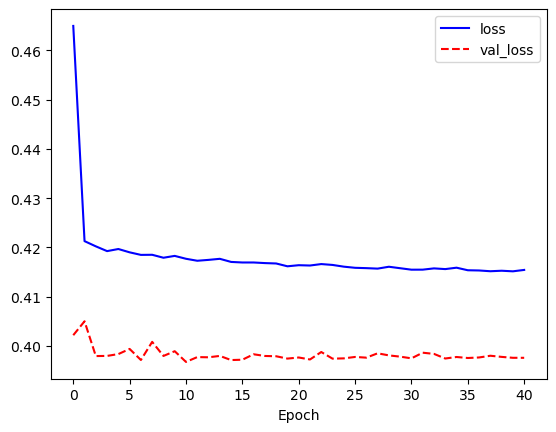

In [30]:
# train loss, val loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

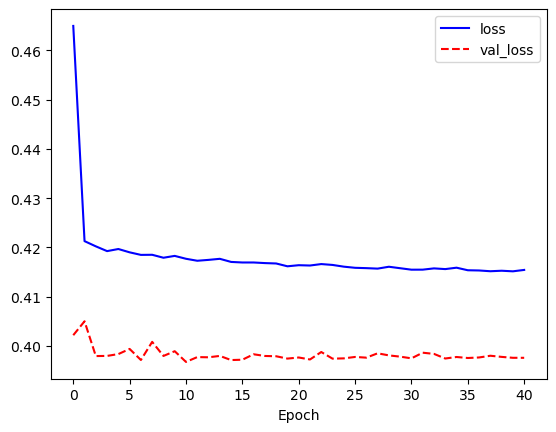

In [32]:
# train loss, val loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [34]:
sample_submission = pd.read_csv('open/sample_submission.csv')

sample_submission["ECLO"] = model.predict(test_x.astype('float32'))

sample_submission.to_csv("submission_external_modified_fstdense264.csv", index=False)

343/343 [==============================] - 0s 1ms/step
